# 
<h1 style="
    background-color:#2f632a;
    color:#fff;
    padding:20px;
    border-radius:8px;
    text-align:center;
    font-family:Consolas, 'Courier New', monospace;
">
Spotify - Naive Bayes
</h1>

<div style="background-color:#f4faf2; font-family:Consolas; padding:10px; border-radius:8px;">

| **Step to be Executed**                                          |
| ---------------------------------------------- | 
| Data Processing                        | 
| Data split                            | 
| Model Training                             | 
| Model Evaluation                        |   

 </div>

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
1. Data Processing
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
The data set spotify_clean_ABT.xlsx is loaded, previously worked on in the EDA.
</div>

In [1]:
import pandas as pd

# Read the dataset
df_final_ABT = pd.read_excel("spotify_clean_ABT.xlsx")

# Quick preview
print("File loaded successfully with shape:", df_final_ABT.shape)
df_final_ABT.sample(5)

File loaded successfully with shape: (2085, 23)


,artist_popularity,danceability,energy,key,loudness,mode,liveness,valence,tempo,artist_name_encoded,...,dance_energy_ratio,valence_energy,duration_min,instrumentalness_log,acousticness_log,speechiness_log,artist_song_count,artist_avg_popularity,decade,is_modern
1277,60,0.766,0.692,1,66,1,0.0384,0.691,102.028,375,...,1.106935,0.478172,3.419333,0.000000,0.079273,0.028490,3,67.000,2000,0
400,73,0.727,0.552,2,90,0,0.1980,0.607,168.189,549,...,1.317027,0.335064,4.819333,0.000164,0.204572,0.131028,8,68.875,2000,0
668,78,0.732,0.396,4,97,0,0.1050,0.548,90.024,799,...,1.848480,0.217008,3.265333,0.000036,0.080750,0.028199,2,84.000,2010,1
706,79,0.688,0.530,11,74,1,0.0995,0.162,106.958,441,...,1.298111,0.085860,3.428117,0.000000,0.366724,0.032758,5,75.000,2010,1
1009,82,0.709,0.220,7,107,1,0.1750,0.530,110.076,578,...,3.222713,0.116600,3.650667,0.000000,0.593879,0.032177,10,79.700,2010,0


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
2. Data Split
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
In this step, the target column popularity_class is converted into numbers using a LabelEncoder.
All the other columns become the features (X) that the model will use to make predictions.
</div>

In [2]:
# Define predictors (X) and target (y)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
 

import pandas as pd

y = le.fit_transform(df_final_ABT['popularity_class'])
y = pd.Series(y)   #convert to Series

X = df_final_ABT.drop('popularity_class', axis=1)

print("Features shape:", X.shape)
print("Target distribution (%):")
print(y.value_counts(normalize=True) * 100)



print("Features shape:", X.shape)
print("Target distribution:")
print(y.value_counts(normalize=True) * 100)

Features shape: (2085, 22)
Target distribution (%):
0    76.115108
2    22.206235
1     1.678657
Name: proportion, dtype: float64
Features shape: (2085, 22)
Target distribution:
0    76.115108
2    22.206235
1     1.678657
Name: proportion, dtype: float64


<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
The dataset is split into 80% training and 20% testing sets.
stratify=y keeps class proportions consistent, and random_state=42 ensures reproducibility.
</div>

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
3. Model Training
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
This step builds and evaluates a Naive Bayes classifier to predict song popularity classes.

. It’s trained on the training set and then used to predict both training and test data.

. Accuracy scores for both datasets help check model performance and possible overfitting.

. A classification report and confusion matrix show how well the model performs for each class.

</div>

In [4]:
import time 
start = time.time()

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and fit
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_train = nb.predict(X_train)
# Predict
y_pred = nb.predict(X_test)

# Evaluate
print("Accuracy for training data:", accuracy_score(y_train, y_pred_train))
print("Accuracy for test data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

end = time.time()
print(f"Training time: {end - start:.2f} seconds")

Accuracy for training data: 0.776378896882494
Accuracy for test data: 0.7553956834532374

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.83       317
           1       0.21      0.71      0.32         7
           2       0.53      0.71      0.61        93

    accuracy                           0.76       417
   macro avg       0.55      0.73      0.59       417
weighted avg       0.81      0.76      0.77       417


Confusion Matrix:
 [[244  16  57]
 [  1   5   1]
 [ 24   3  66]]
Training time: 0.05 seconds


## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
4. Model Evaluation
</h2>

<div style="color:#2f632a; font-family:Consolas; padding:10px; border-radius:8px;">
This section evaluates the tuned model.
    
. Accuracy and balanced accuracy are calculated to assess performance and check for overfitting.

. Classification report summarizes precision, recall, and F1-scores for each class.

. Confusion matrix heatmap visualizes how well the tuned model distinguishes between classes.

. Feature importance Analysis to identify which features influence the model the most.

</div>

Accuracy for training data: 0.776
Balanced Accuracy for training data: 0.764

Accuracy for test data: 0.755
Balanced Accuracy for test data: 0.731

Classification Report:
               precision    recall  f1-score   support

           0      0.907     0.770     0.833       317
           1      0.208     0.714     0.323         7
           2      0.532     0.710     0.608        93

    accuracy                          0.755       417
   macro avg      0.549     0.731     0.588       417
weighted avg      0.812     0.755     0.774       417



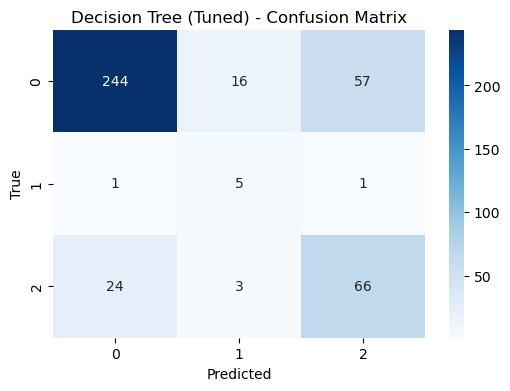

In [5]:
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score, balanced_accuracy_score, classification_report
)

best_dt = nb
# 1️Make predictions with your tuned Decision Tree model
y_pred_best = best_dt.predict(X_test)
y_train_best = best_dt.predict(X_train)
# 2️Evaluate tuned Decision Tree model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Train Metrics ---
print("Accuracy for training data:", round(accuracy_score(y_train, y_train_best), 3))
print("Balanced Accuracy for training data:", round(balanced_accuracy_score(y_train, y_train_best), 3))

# --- Test Metrics ---
print("\nAccuracy for test data:", round(accuracy_score(y_test, y_pred_best), 3))
print("Balanced Accuracy for test data:", round(balanced_accuracy_score(y_test, y_pred_best), 3))

# --- Classification Report ---
print("\nClassification Report:\n", classification_report(y_test, y_pred_best, digits=3))



# 3️Confusion Matrix visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree (Tuned) - Confusion Matrix')
plt.show()

Approximate Naïve Bayes Feature Importance:
                 Feature  Importance_Score
0                 decade          2.545289
1              is_modern          2.174462
2  artist_avg_popularity          1.755129
3      artist_popularity          1.293475
4           duration_min          0.675250
5                 energy          0.618475
6         valence_energy          0.486155
7      artist_song_count          0.445006
8                    key          0.443485
9       acousticness_log          0.398870


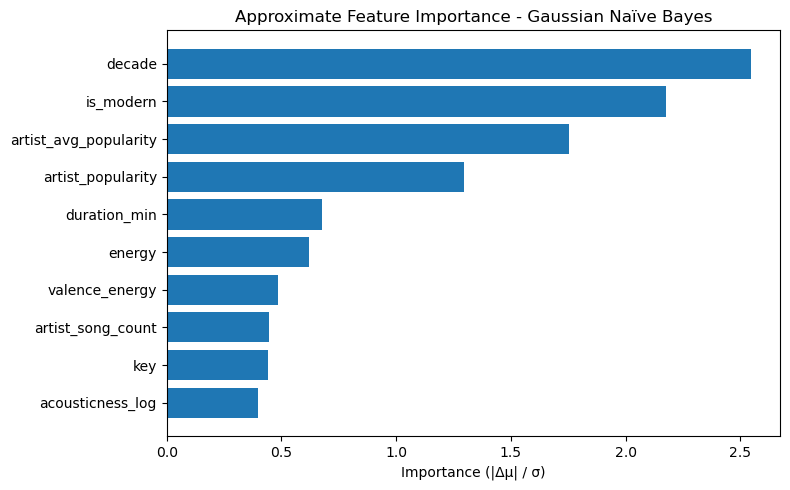

In [6]:
import numpy as np
# --- Compute approximate feature importance ---
# Features with large mean differences and small variances are more discriminative
means = nb.theta_          # shape (n_classes, n_features)
variances = nb.var_        # <-- FIX: replaced 'sigma_' with 'var_' (current attribute)

# Compute normalized mean range per feature
importance = np.abs(means.max(axis=0) - means.min(axis=0)) / np.sqrt(variances.mean(axis=0))

# Convert to a DataFrame for readability
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance_Score': importance
}).sort_values(by='Importance_Score', ascending=False).reset_index(drop=True)

# Display top 10 features
print("Approximate Naïve Bayes Feature Importance:")
print(importance_df.head(10))

# Optional visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'].head(10)[::-1],
         importance_df['Importance_Score'].head(10)[::-1])
plt.xlabel("Importance (|Δμ| / σ)")
plt.title("Approximate Feature Importance - Gaussian Naïve Bayes")
plt.tight_layout()
plt.show()


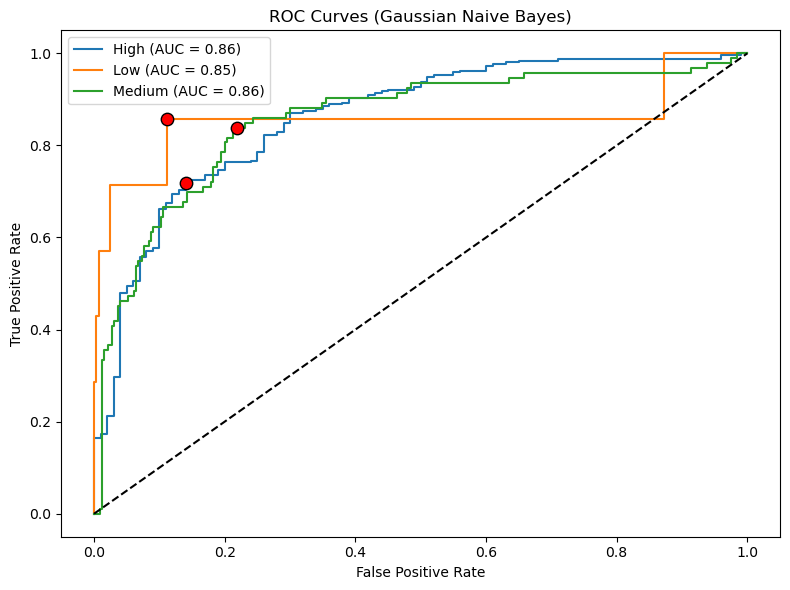

Class order: [0 1 2]
Optimal thresholds: {0: 0.7084155125228407, 1: 0.1216096018024591, 2: 0.24148568287993696}


In [7]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

clf = nb
classes_enc = clf.classes_
y_pred_proba = clf.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=classes_enc)

fpr, tpr, roc_auc, optimal_thresholds = {}, {}, {}, {}
for i, enc in enumerate(classes_enc):
    fpr[enc], tpr[enc], thr = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[enc] = auc(fpr[enc], tpr[enc])
    j = tpr[enc] - fpr[enc]
    best_idx = np.argmax(j)
    optimal_thresholds[enc] = thr[best_idx]

plt.figure(figsize=(8,6))
for enc in classes_enc:
    label_txt = le.inverse_transform([enc])[0]
    plt.plot(fpr[enc], tpr[enc], label=f"{label_txt} (AUC = {roc_auc[enc]:.2f})")
    best_idx = np.argmax(tpr[enc] - fpr[enc])
    plt.scatter(fpr[enc][best_idx], tpr[enc][best_idx],
                color='red', s=80, edgecolor='black', zorder=5)

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves (Gaussian Naive Bayes)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

print("Class order:", classes_enc)
print("Optimal thresholds:", optimal_thresholds)

## 
<h2 style="
    background-color: transparent;
    color:#2f632a;
    padding:12px;
    border-radius:6px;
    border-bottom:3px solid #2f632a;
    font-family:Consolas, 'Courier New', monospace;
">
5. Wrap-up Model Evaluation Summary
</h2>

In [8]:
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    classification_report
)

acc        = accuracy_score(y_test, y_pred_best)
bal_acc    = balanced_accuracy_score(y_test, y_pred_best)
macro_f1   = f1_score(y_test, y_pred_best, average='macro')
weighted_f1= f1_score(y_test, y_pred_best, average='weighted')

print(f"Accuracy: {acc:.3f}")
print(f"Balanced Accuracy: {bal_acc:.3f}")
print(f"Macro F1-score: {macro_f1:.3f}")
print(f"Weighted F1-score: {weighted_f1:.3f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred_best))

Accuracy: 0.755
Balanced Accuracy: 0.731
Macro F1-score: 0.588
Weighted F1-score: 0.774

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       317
           1       0.21      0.71      0.32         7
           2       0.53      0.71      0.61        93

    accuracy                           0.76       417
   macro avg       0.55      0.73      0.59       417
weighted avg       0.81      0.76      0.77       417

